In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import porter
import ssl

import numpy as np
import matplotlib.pyplot as plt
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
# nltk.download("punkt")

In [2]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,stars_review,useful,funny,cool,text,date,name,address,city,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl",Philadelphia,...,0,0,0,0,0,0,0,0,0,0
1,1,5.0,0,0,0,"Welcome to the neighborhood, Sweet Life Bakesh...",2015-04-16 16:34:29,The Sweet Life Bakeshop,740 South St,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,3,1,0,We decided to give the Barrel House another sh...,2016-04-11 12:37:22,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
3,3,5.0,0,0,0,These guys were fantastic! They moved my grand...,2018-11-07 15:17:25,Ivy Student Movers,NaN,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
4,4,5.0,0,0,0,I've been going to Body Cycle for about a year...,2012-08-16 12:49:05,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl",Philadelphia,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967545,967545,5.0,2,0,0,Amazing customer experience. Locksmith was the...,2017-04-12 00:31:36,AMPM Locksmith - Philadelphia,621 N 2nd St,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
967546,967546,5.0,2,0,0,My tenant was locked out and I called Shay for...,2018-06-26 13:20:26,AMPM Locksmith - Philadelphia,621 N 2nd St,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
967547,967547,1.0,0,0,0,These two guys showed up to look at the roof o...,2019-09-04 14:43:07,Katona James A Sr Roofing,4384 Manayunk Ave,Philadelphia,...,0,0,0,0,0,0,0,0,0,0
967548,967548,1.0,2,0,0,"Jim repaired our leaking roof, and guaranteed ...",2018-02-11 16:45:38,Katona James A Sr Roofing,4384 Manayunk Ave,Philadelphia,...,0,0,0,0,0,0,0,0,0,0


In [3]:
restaurants = pd.read_csv("business_attributes_old.csv")
restaurants

,Unnamed: 0,name,address,postal_code,stars,categories,useful_review,useful_count
0,0,St Honore Pastries,935 Race St,19107.0,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",I really enjoyed my brief visit to St.Honore P...,35
1,1,Tuna Bar,205 Race St,19106.0,4.0,"Sushi Bars, Restaurants, Japanese",Finally got a chance to check this place out f...,32
2,2,BAP,1224 South St,19147.0,4.5,"Korean, Restaurants",I've been told I have nice BAPs. I have no ide...,14
3,3,Bar One,767 S 9th St,19147.0,4.0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",$6.50 for a Kenzinger and the bartender didn't...,7
4,4,DeSandro on Main,4105 Main St,19127.0,3.0,"Pizza, Restaurants, Salad, Soup",Secura? Sacada? I'm not sure. But you know who...,3
...,...,...,...,...,...,...,...,...
5047,5047,Stina Pizzeria,1705 Snyder Ave,19145.0,4.5,"Pizza, Restaurants, Mediterranean",Stina is without a doubt worthy all the hype!!...,23
5048,5048,Flip-N-Pizza,1308 W Girard Ave,19123.0,4.0,"Restaurants, American (Traditional), Chicken W...",I ordered through Uber Eats. The food was prep...,3
5049,5049,Ali Baba Magic Food,37TH And Walnut,19104.0,4.0,"Restaurants, Food Stands",Free taste.\nStill don't know what it was.\nIt...,2
5050,5050,Tata Cafe,7201 Germantown Ave,19119.0,4.0,"Sandwiches, Restaurants, Italian",Neighborhood gem! \n\nWe appreciate the promp...,3


In [4]:
data = pd.merge(data, restaurants, left_on="name", right_on="name")
data

,Unnamed: 0_x,stars_review,useful,funny,cool,text,date,name,address_x,city,...,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0_y,address_y,postal_code_y,stars,categories_y,useful_review,useful_count
0,2,1.0,3,1,0,We decided to give the Barrel House another sh...,2016-04-11 12:37:22,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,0,0,0,4271,625-27 S 6th St,19147.0,3.0,"Food, Breweries, Nightlife, Pubs, Sandwiches, ...",3.5 Stars. Unfortunately our first experience ...,19
1,1247,3.0,3,1,1,A quick gander at my face as I was ogling the ...,2014-12-05 16:35:37,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,129,103,19,4271,625-27 S 6th St,19147.0,3.0,"Food, Breweries, Nightlife, Pubs, Sandwiches, ...",3.5 Stars. Unfortunately our first experience ...,19
2,5924,4.0,1,0,0,Update for Happy Hour:\n\nIf you like craft be...,2014-02-15 23:25:27,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,71,27,3,4271,625-27 S 6th St,19147.0,3.0,"Food, Breweries, Nightlife, Pubs, Sandwiches, ...",3.5 Stars. Unfortunately our first experience ...,19
3,5925,4.0,4,0,3,"I have been here twice, and I had good experie...",2012-11-18 23:01:37,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,71,27,3,4271,625-27 S 6th St,19147.0,3.0,"Food, Breweries, Nightlife, Pubs, Sandwiches, ...",3.5 Stars. Unfortunately our first experience ...,19
4,6021,1.0,3,1,0,I ventured here on opening night with a party ...,2012-12-13 03:08:34,Bainbridge Street Barrel House,625-27 S 6th St,Philadelphia,...,2,3,0,4271,625-27 S 6th St,19147.0,3.0,"Food, Breweries, Nightlife, Pubs, Sandwiches, ...",3.5 Stars. Unfortunately our first experience ...,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687030,847851,2.0,0,0,0,"The food is tasty. I had a delivery today, I o...",2020-04-28 00:16:16,Ajw Jamaican and American Food,4507 N Broad St,Philadelphia,...,0,0,0,4344,4507 N Broad St,19140.0,2.0,"Breakfast & Brunch, Caribbean, Restaurants",SAVE YOURSELF! If I could give them ZERO I wou...,2
687031,879615,1.0,0,0,0,"Food is just horrible, the food is never fresh...",2018-07-21 02:52:56,Ajw Jamaican and American Food,4507 N Broad St,Philadelphia,...,0,0,0,4344,4507 N Broad St,19140.0,2.0,"Breakfast & Brunch, Caribbean, Restaurants",SAVE YOURSELF! If I could give them ZERO I wou...,2
687032,947170,5.0,0,0,0,"I can't speak on past reviews, but I have just...",2019-09-19 04:05:22,Ajw Jamaican and American Food,4507 N Broad St,Philadelphia,...,0,0,0,4344,4507 N Broad St,19140.0,2.0,"Breakfast & Brunch, Caribbean, Restaurants",SAVE YOURSELF! If I could give them ZERO I wou...,2
687033,947171,1.0,0,0,1,VERY disappointing! I spent so much on a large...,2020-11-24 04:35:19,Ajw Jamaican and American Food,4507 N Broad St,Philadelphia,...,0,0,0,4344,4507 N Broad St,19140.0,2.0,"Breakfast & Brunch, Caribbean, Restaurants",SAVE YOURSELF! If I could give them ZERO I wou...,2


In [5]:
review_texts = {}
for i in tqdm(range(len(data))):
    row = data.iloc[i]
    if row["name"] not in review_texts:
        review_texts[row["name"]] = ""
    review_texts[row["name"]] += "\n" + row["text"].lower()


  0%|          | 0/687035 [00:00<?, ?it/s]

In [6]:
restaurant_reviews = pd.DataFrame(review_texts.items())
restaurant_reviews.columns = ["name", "reviews"]
restaurant_reviews

,name,reviews
0,Bainbridge Street Barrel House,\nwe decided to give the barrel house another ...
1,Farmer's Keep,\nbig fan. i think this is probably a big lunc...
2,Kaufman's Delicatessen,\ni love 4th st deli. i was so happy when the...
3,The Night Kitchen,\nthe customer service sucks! the employees tr...
4,Jansen,\nloved all my selections: very fresh & crisp ...
...,...,...
5047,Istanbul Grill & Cafe,\ndo not patronize this restaurant. a close fr...
5048,Bocci's Steakhouse & Comedy Cafe,\nthis is the absolute worse place to eat! the...
5049,Montego Grill,\nit's nasty. nothing i got form the jerk chic...
5050,Angelina's Panini Bar,\noh goodness. avoid avoid avoid. they're not ...


In [7]:
review_words = {}
for k, v in tqdm(review_texts.items()):
    review_words[k] = word_tokenize(v)

  0%|          | 0/5052 [00:00<?, ?it/s]

In [8]:
reviews_stemmed = {}
stemmer = porter.PorterStemmer()
for k, v in tqdm(review_words.items()):
    reviews_stemmed[k] = []
    for word in v:
        reviews_stemmed[k].append(stemmer.stem(word))

  0%|          | 0/5052 [00:00<?, ?it/s]

In [9]:
terms = set()
for k, v in tqdm(reviews_stemmed.items()):
    terms.update(v)

terms = list(terms)
terms.sort()
terms

  0%|          | 0/5052 [00:00<?, ?it/s]

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'-",
 "'00",
 "'01",
 "'02",
 "'03",
 "'04",
 "'04-'05",
 "'05",
 "'06",
 "'06-2010",
 "'06~'08",
 "'07",
 "'08",
 "'09",
 "'09-'14",
 "'10",
 "'100",
 "'11",
 "'11-'12",
 "'111",
 "'12",
 "'13",
 "'14",
 "'14oz",
 "'15",
 "'1500",
 "'16",
 "'17",
 "'18",
 "'19",
 "'20",
 "'2001",
 "'202",
 "'20s/earli",
 "'22",
 "'23",
 "'29",
 "'2nd",
 "'30",
 "'33",
 "'36",
 "'39",
 "'40",
 "'47-'94",
 "'49",
 "'50",
 "'50/50",
 "'500",
 "'50s-'60s-'70",
 "'50s-diner",
 "'57",
 "'60",
 "'65",
 "'67",
 "'70",
 "'70s-style",
 "'71",
 "'72",
 "'73",
 "'75",
 "'76",
 "'77",
 "'78",
 "'79",
 "'80",
 "'80s-'90",
 "'80s-born",
 "'81",
 "'83",
 "'84",
 "'86",
 "'87",
 "'88",
 "'88-'98",
 "'89",
 "'90",
 "'90s-era",
 "'90s/earli",
 "'91",
 "'93",
 "'93-'94",
 "'94",
 "'95",
 "'96",
 "'97",
 "'98",
 "'99",
 "'_____",
 "'a",
 "'aaaaaa",
 "'aaahhh",
 "'aah",
 "'aaron/erin",
 "'ab",
 "'abandon",
 "'abc",
 "'about",
 "'abov",
 "'absenc",
 "'absinth",
 "'absolut",
 "'ac

In [10]:
word_to_index = {}
for i in range(len(terms)):
    word_to_index[terms[i]] = i

In [11]:
restaurant_to_index = {}
r = list(restaurants["name"])
r.sort()
for i in range(len(r)):
    restaurant_to_index[r[i]] = i

In [12]:
word_count = {}
for k, v in tqdm(reviews_stemmed.items()):
    for word in v:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1

  0%|          | 0/5052 [00:00<?, ?it/s]

In [13]:
word_count_df = pd.DataFrame(word_count.items())
word_count_df

,0,1
0,we,666191
1,decid,39428
2,to,1621637
3,give,73362
4,the,4067015
...,...,...
250966,say/sh,2
250967,badbocci,1
250968,botchedbusinessatbocci,1
250969,right.do,1


In [14]:
tf_matrix = np.zeros((len(restaurants), len(terms)))
for k, v in tqdm(reviews_stemmed.items()):
    for word in v:
        tf_matrix[restaurant_to_index[k], word_to_index[word]] += 1

  0%|          | 0/5052 [00:00<?, ?it/s]

In [15]:
df_matrix = np.zeros((len(restaurants), len(terms)))
for k, v in tqdm(reviews_stemmed.items()):
    for word in v:
        df_matrix[restaurant_to_index[k], word_to_index[word]] = 1
df = df_matrix.sum(axis=0)

  0%|          | 0/5052 [00:00<?, ?it/s]

In [34]:
idf = np.log(len(restaurants) / (1 + df))
idf

array([5.95594375e-03, 1.09564757e+00, 1.18599877e-01, ...,
       7.83439230e+00, 7.83439230e+00, 7.83439230e+00])

In [17]:
tf_idf_scores = tf_matrix * idf
tf_idf_scores

array([[ 0.02382378,  0.        ,  1.30459865, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60750626,  0.        ,  1.89759804, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.28172501,  1.09564757,  6.40439338, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.17272237,  0.        ,  0.23719975, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.27041167,  6.5738854 , 20.51777881, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04764755,  0.        ,  0.83019914, ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
avg_tf_idf = tf_idf_scores.sum(axis=0)

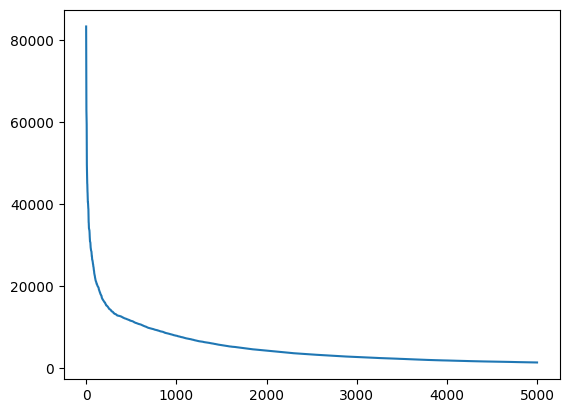

In [37]:
plt.plot(sorted(avg_tf_idf, reverse=True)[:5000])

In [43]:
tf_idf_threshold = 10000
sorted_index = np.argsort(avg_tf_idf)[:tf_idf_threshold]


# for i in tqdm(range(len(terms))):
#     if sorted_index[i] < tf_idf_threshold:
top_tf_idf = tf_idf_scores[:,sorted_index]

In [44]:
top_tf_idf

array([[-0.00672934, -0.00475012, -0.00514597, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07026225, -0.06194953, -0.04473033, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39168728, -0.33983177, -0.24720436, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.04769916, -0.03938644, -0.02454231, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71726868, -0.60089065, -0.39920831, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01504206, -0.01187531, -0.00791687, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
np.array(terms)[sorted_index]

array(['.', 'the', 'and', ..., 'menu123.com', 'menu=anoth', 'menu=no'],
      dtype='<U355')

In [47]:
norms = []
for x in tqdm(range(5052)):
    norms.append(np.linalg.norm(top_tf_idf[x]))

  0%|          | 0/5052 [00:00<?, ?it/s]

In [49]:
cosine_sim_matrix = np.zeros((5052, 5052))

for x in tqdm(range(5052)):
    for y in range(5052):
        if cosine_sim_matrix[y, x] != 0:
            cosine_sim_matrix[x, y] = cosine_sim_matrix[y, x]
        else:
            cosine_sim_matrix[x, y] = np.dot(top_tf_idf[x], top_tf_idf[y]) / (norms[x] * norms[y])

  0%|          | 0/5052 [00:00<?, ?it/s]

In [50]:
cosine_sim_matrix

array([[1.        , 0.98836267, 0.03069348, ..., 0.9824168 , 0.05003118,
        0.98550223],
       [0.98836267, 1.        , 0.03098548, ..., 0.99677189, 0.05065749,
        0.99430358],
       [0.03069348, 0.03098548, 1.        , ..., 0.03092847, 0.00157162,
        0.03089736],
       ...,
       [0.9824168 , 0.99677189, 0.03092847, ..., 1.        , 0.05072528,
        0.99880224],
       [0.05003118, 0.05065749, 0.00157162, ..., 0.05072528, 1.        ,
        0.0506692 ],
       [0.98550223, 0.99430358, 0.03089736, ..., 0.99880224, 0.0506692 ,
        1.        ]])

In [51]:
cosine_sim_df = pd.DataFrame(cosine_sim_matrix)
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,5042,5043,5044,5045,5046,5047,5048,5049,5050,5051
0,1.000000,0.988363,0.030693,0.981987,0.037849,0.982080,0.920023,0.038586,0.019389,0.018627,...,0.005473,0.033230,0.022786,0.008764,0.996472,0.014721,0.972006,0.982417,0.050031,0.985502
1,0.988363,1.000000,0.030985,0.989937,0.038898,0.995288,0.930943,0.039175,0.019634,0.018867,...,0.005508,0.033684,0.022698,0.008817,0.991259,0.015007,0.986139,0.996772,0.050657,0.994304
2,0.030693,0.030985,1.000000,0.030684,0.001207,0.030902,0.029004,0.001217,0.000610,0.000586,...,0.000171,0.001045,0.000705,0.000274,0.030827,0.000466,0.030669,0.030928,0.001572,0.030897
3,0.981987,0.989937,0.030684,1.000000,0.038721,0.976711,0.877096,0.038765,0.019313,0.018674,...,0.005416,0.033176,0.022259,0.008824,0.981775,0.015070,0.962921,0.978951,0.049900,0.977275
4,0.037849,0.038898,0.001207,0.038721,1.000000,0.038914,0.036192,0.001542,0.000769,0.000740,...,0.000214,0.001314,0.000874,0.000346,0.038364,0.000596,0.038744,0.038947,0.001977,0.038831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,0.014721,0.015007,0.000466,0.015070,0.000596,0.014969,0.013733,0.000595,0.000296,0.000285,...,0.000082,0.000506,0.000338,0.000134,0.014886,1.000000,0.014881,0.014978,0.000761,0.014967
5048,0.972006,0.986139,0.030669,0.962921,0.038744,0.997539,0.971860,0.039174,0.019678,0.018793,...,0.005485,0.033483,0.022685,0.008746,0.986707,0.014881,1.000000,0.996038,0.050440,0.997500
5049,0.982417,0.996772,0.030928,0.978951,0.038947,0.999785,0.955061,0.039286,0.019717,0.018886,...,0.005515,0.033708,0.022754,0.008798,0.990962,0.014978,0.996038,1.000000,0.050725,0.998802
5050,0.050031,0.050657,0.001572,0.049900,0.001977,0.050702,0.048131,0.001994,0.001000,0.000959,...,0.000280,0.001711,0.001155,0.000447,0.050381,0.000761,0.050440,0.050725,1.000000,0.050669


In [52]:
cosine_sim_df.to_csv("cosine_matrix.csv")